# Lineare Regressionen

## Imports

In [2]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Datengrundlage

In [3]:
x = np.array([84,1323,282,957,1386,810,396,474,501,660,1260,1005,1110,1290])
y = np.array([44,97,30,51,95,51,44,41,21,40,90,83,61,92])

## Fehlerfunktionen

In [4]:
def sse(y_pred, y):
    return (y_pred - y) ** 2

def mse(y_pred, y):
    return np.mean((y_pred - y) ** 2)

def rmse(y_pred, y):
    return np.sqrt(np.mean((y_pred - y) ** 2))

## SSE für willkürliche Gewichte

In [5]:
for w in np.linspace(0.05,0.09,5):
    print("SSE für Gewicht {}: {}".format(w,sse(np.dot(x,w),y)))

SSE für Gewicht 0.05: [1584.04    951.7225  252.81      9.9225  660.49    110.25    585.64
  299.29     16.4025   49.      729.     1072.5625   30.25    756.25  ]
SSE für Gewicht 0.06: [1.5178816e+03 3.1046440e+02 1.7108640e+02 4.1216400e+01 1.4018560e+02
 5.7600000e+00 4.0965760e+02 1.5775360e+02 8.2083600e+01 1.6000000e-01
 2.0736000e+02 5.1529000e+02 3.1360000e+01 2.1316000e+02]
SSE für Gewicht 0.07: [1453.1344   19.2721  105.2676  255.6801    4.0804   32.49    265.0384
   61.1524  197.9649   38.44      3.24    160.0225  278.89      2.89  ]
SSE für Gewicht 0.08: [1389.7984   78.1456   55.3536  653.3136  252.1744  190.44    151.7824
    9.4864  364.0464  163.84    116.64      6.76    772.84    125.44  ]
SSE für Gewicht 0.09: [1327.8736  487.0849   21.3444 1234.1169  884.4676  479.61     69.8896
    2.7556  580.3281  376.36    547.56     55.5025 1513.21    580.81  ]


## Plot der Gewichte und Datenpunkte

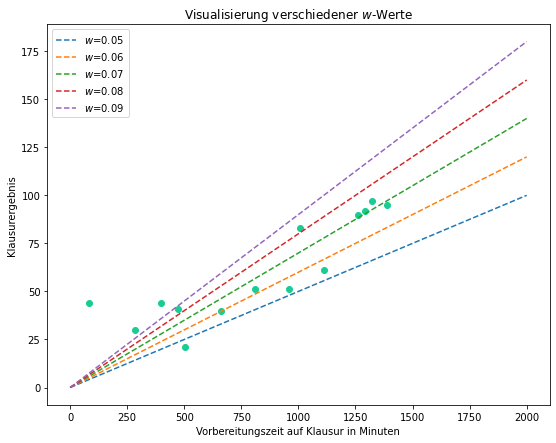

In [6]:
x_axis = np.linspace(0,2000)
plt.figure(figsize=(9,7))
plt.scatter(x,y,c="#1acc94")
for w in np.linspace(0.05,0.09,5):
    plt.plot(x_axis,x_axis*w,label="$w$={}".format(w),ls="--")
plt.title("Visualisierung verschiedener $w$-Werte")
plt.xlabel("Vorbereitungszeit auf Klausur in Minuten")
plt.ylabel("Klausurergebnis")
plt.legend()
plt.show()

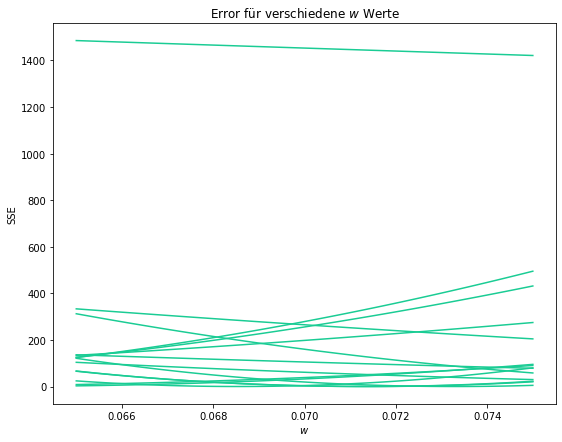

In [7]:
w_values = np.linspace(0.065,0.075)
plt.figure(figsize=(9,7))
plt.plot(w_values,[sse((w*x),y) for w in w_values],c="#1acc94")
plt.title("Error für verschiedene $w$ Werte")
plt.xlabel("$w$")
plt.ylabel("SSE")
plt.show()

## Ableitung der Fehlerfunktion

In [8]:
def derivative_sse(x,w,y):
    return np.sum(2*x*(x*w-y))
    
print("Gradient von w bei 0.066: {}".format(derivative_sse(x,0.066,y)))
print("Gradient von w bei 0.068: {}".format(derivative_sse(x,0.068892845,y))) #etwas mehr Nachkommastellen für die Genauigkeit
print("Gradient von w bei 0.073: {}".format(derivative_sse(x,0.073,y)))

Gradient von w bei 0.066: -68802.09599999995
Gradient von w bei 0.068: 0.010342679845962266
Gradient von w bei 0.073: 97682.71199999988


## Wirkung von Bias und Polynom

C:\Users\Arkhi\AppData\Local\Temp/ipykernel_18468/3033405720.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


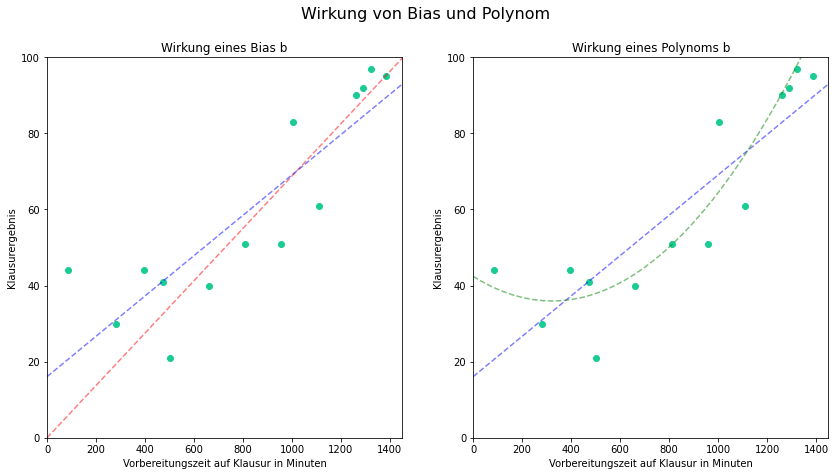

In [9]:
def vanilla_model(x,w):
    return x*w

def model_with_bias(x,w,b):
    return x*w+b

def polynomial_model(x,w1,w2,b):
    return x*w1+(x**2)*w2+b

fig = plt.figure(figsize=(14,7))
fig.suptitle("Wirkung von Bias und Polynom", fontsize=16)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(x,y,c="#1acc94")
ax1.plot(x_axis,vanilla_model(x_axis,0.0688),ls="--",c="red",label="Ohne Bias",alpha=0.5)
ax1.plot(x_axis,model_with_bias(x_axis,0.053,16.08),ls="--",c="blue",label="Mit Bias",alpha=0.5)
ax1.set_xlim([0,1450])
ax1.set_ylim([0,100])
ax1.set_title("Wirkung eines Bias b")
ax1.set_xlabel("Vorbereitungszeit auf Klausur in Minuten")
ax1.set_ylabel("Klausurergebnis")

ax2.scatter(x,y,c="#1acc94")
ax2.plot(x_axis,model_with_bias(x_axis,0.053,16.08),ls="--",c="blue",label="Mit Bias",alpha=0.5)
ax2.plot(x_axis,polynomial_model(x_axis,-0.04,0.000062,42.4),ls="--",c="green",label="Mit Bias",alpha=0.5)
ax2.set_xlim([0,1450])
ax2.set_ylim([0,100])
ax2.set_title("Wirkung eines Polynoms b")
ax2.set_xlabel("Vorbereitungszeit auf Klausur in Minuten")
ax2.set_ylabel("Klausurergebnis")
fig.show()


## Overfit durch zu viele Polynome

In [10]:
poly = PolynomialFeatures(8)
x_poly = poly.fit_transform(x.reshape(-1, 1))
model = LinearRegression()
model.fit(x_poly,y)

LinearRegression()

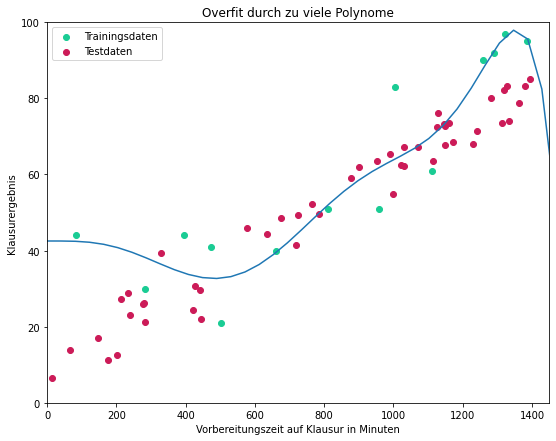

In [11]:
# Beispielhafte Testdaten zur Visualisierung der Wirkung der Ausreißer
x_test = np.random.randint(0,1400,50)
y_test = x_test*0.053+16
y_test += np.random.normal(-5,5,50)

plt.figure(figsize=(9,7))
plt.scatter(x,y,c="#1acc94",label="Trainingsdaten")
plt.scatter(x_test,y_test,c="#cc1b58",label="Testdaten")
plt.plot(x_axis,model.predict(poly.transform(x_axis.reshape(-1, 1))))
plt.xlim([0,1450])
plt.ylim([0,100])
plt.title("Overfit durch zu viele Polynome")
plt.xlabel("Vorbereitungszeit auf Klausur in Minuten")
plt.ylabel("Klausurergebnis")
plt.legend()
plt.show()

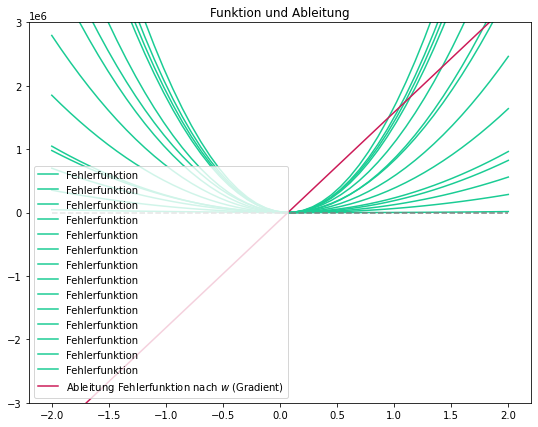

In [12]:
def sse_d(w):
    return np.mean(2*x*(w*x-y))

def s(w):
    return (w**2)+10

w_values = np.linspace(-2,2)
plt.figure(figsize=(9,7))
plt.plot(w_values,[sse((w*x),y) for w in w_values],c="#1acc94",label="Fehlerfunktion")
plt.plot(w_values,[sse_d(w) for w in w_values],c="#cc1b58",label="Ableitung Fehlerfunktion nach $w$ (Gradient)")
plt.hlines(0,-2,2,color="grey",ls="--")
plt.ylim([-3000000,3000000])
plt.title("Funktion und Ableitung")
#plt.xlabel("$w$")
plt.legend()
#plt.ylabel("SSE")
plt.show()

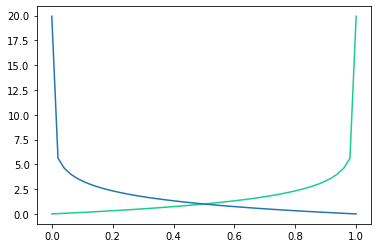

In [13]:
l = np.linspace(0.000001,0.999999)
def error_0(y):
    return -np.mean(np.log2(1-y))

def error_1(y):
    return -np.mean(np.log2(y))

plt.plot(l,[error_0(p) for p in l],color="#1acc94")
plt.plot(l,[error_1(p) for p in l])
plt.show()

In [14]:
import time
import asyncio

async def f():
    print("start")
    time.sleep(10)
    print("end")
    
f()
print("A")
await f()

C:\Users\Arkhi\AppData\Local\Temp/ipykernel_18468/3383464934.py:9: RuntimeWarning: coroutine 'f' was never awaited
  f()


A
start
end
